In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
from torchvision import transforms

import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import pandas as pd
import seaborn as sns

import time
import os
from PIL import Image
from tempfile import TemporaryDirectory

In [4]:
# NEED TO RUN AT AVERY NEW RUNTIME
# Setup google drive connection
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import gspread
from google.auth import default
from google.colab import auth

# Autenticazione
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

Mounted at /content/drive


In [ ]:
# TO BE RUNNED JUST THE FIRST TIME!
# Setup git integration
%cd /content/drive/MyDrive
!git clone https://github.com/s348174/MLDL2024_project1.git
%cd

/content/drive/MyDrive
Cloning into 'MLDL2024_project1'...
remote: Enumerating objects: 80, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 80 (delta 25), reused 45 (delta 13), pack-reused 11 (from 2)
Receiving objects: 100% (80/80), 752.09 KiB | 8.09 MiB/s, done.
Resolving deltas: 100% (25/25), done.


In [3]:
# RUN EVERYTIME IN ORDER TO AVOID CONFLICTS
# Update drive git directory
%cd /content/drive/MyDrive/MLDL2024_project1
!git pull
%cd

/content/drive/MyDrive/MLDL2024_project1
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 13 (delta 8), reused 11 (delta 6), pack-reused 0 (from 0)
Unpacking objects: 100% (13/13), 1.59 KiB | 0 bytes/s, done.
From https://github.com/s348174/MLDL2024_project1
   18d7c6e..55cdc4c  master     -> origin/master
Updating 18d7c6e..55cdc4c
Fast-forward
 __pycache__/train.cpython-310.pyc | Bin 2448 -> 2418 bytes
 local_launch.py                   |   3 ++-
 train.py                          |   2 +-
 3 files changed, 3 insertions(+), 2 deletions(-)
/root


Found 1572 images and 1572 labels
Image map: 1572
Matched 1572 image-label pairs
Class names: ['hanover', 'jena', 'krefeld', 'monchengladbach', 'strasbourg', 'stuttgart', 'tubingen', 'ulm', 'weimar', 'zurich']
Number of classes: 10
Number of training samples: 1572
Number of labels: 1572
First image /tmp/tmp_y8kmk_6/Cityscapes/Cityspaces/images/train/hanover/hanover_000000_000164_leftImg8bit.png


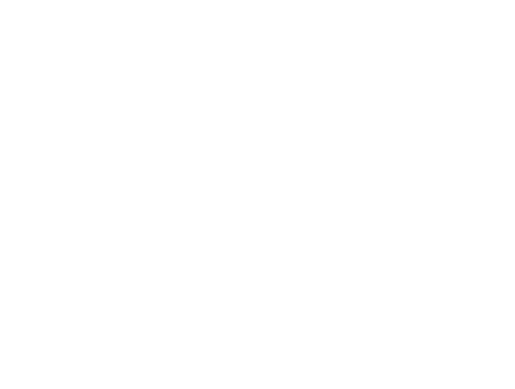

Deeplab pretraining loading...


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/MLDL2024_project1deeplab_resnet_pretrained_imagenet.pth'

In [5]:
import sys
import os
from tempfile import TemporaryDirectory

# Add the directory containing train.py to the system path
google_drive_path = '/content/drive/MyDrive/MLDL2024_project1'
sys.path.append(google_drive_path)
#datasets_folder_path = '/content/drive/MyDrive/MLDL2024_project1/datasets'
#sys.path.append(datasets_folder_path)
#models_path = '/content/drive/MyDrive/MLDL2024_project1/models/deeplabv2'
#sys.path.append(models_path)
from train import deeplab_train

# Open zipfile
import zipfile
zip_path = '/content/drive/MyDrive/machine_learning_shared_2025/Cityscapes.zip'
pretrained_path = google_drive_path + '/deeplab_resnet_pretrained_imagenet.pth'
with zipfile.ZipFile(zip_path) as z:
  # Mostra i file contenuti
  #print("Contenuto dello ZIP:", z.namelist())
  with TemporaryDirectory() as tmpdir:
    z.extractall(tmpdir)
    #image_folder_path=tmpdir+"/Cityscapes/Cityspaces/images/train"
    #train_data = datasets.ImageFolder(
    #    root=image_folder_path,
    #    transform=ToTensor()
    #)
    #test_folder_path=tmpdir+"/Cityscapes/Cityspaces/images/test"
    #test_data = datasets.ImageFolder(
    #    root=image_folder_path,
    #    transform=ToTensor()
    #)

    # Creates symlink to data folder
    real_path = "tmpdir"
    #destinazione_symlink = "/tmp/tmpcp08lfus"
    #if not os.path.exists(destinazione_symlink):
    #    os.symlink(real_path, destinazione_symlink)

    dataset_path = tmpdir+"/Cityscapes/Cityspaces"
    deeplab_train(dataset_path, pretrained_path)